In [9]:
!pip install -U -q PyDrive

^C


In [11]:
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential
import time #helper libraries

# Code to read csv file into Colaboratory:

#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)


In [ ]:
#link = 'https://drive.google.com/open?id=1y394o-wiPqYPaWzVYTPRr8xpE_aM9621'

#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='


In [12]:
import pandas as pd
#downloaded = drive.CreateFile({'id':id})
#downloaded.GetContentFile('AMZN.csv')
df3 = pd.read_csv('/kaggle/input/amazon-stocks-practice/AMZN.csv')



In [13]:
#Basic LSTM

from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential
import time
df3 = df3.dropna(axis = "columns")
df3.head()

,Date,Open,High,Low,Adj Close,Volume,Close
0,1/4/2010,136.250000,136.610001,133.139999,133.899994,7599900,133.899994
1,1/5/2010,133.429993,135.479996,131.809998,134.690002,8851900,134.690002
2,1/6/2010,134.600006,134.729996,131.649994,132.250000,7178800,132.250000
3,1/7/2010,132.009995,132.320007,128.800003,130.000000,11030200,130.000000
4,1/8/2010,130.559998,133.679993,129.029999,133.520004,9830500,133.520004


In [14]:
import numpy as np
#Predicting Closing Prices as before
df_close = df3['Close']
df_close.shape
#Reshaping it
df_close = df_close.values.reshape(2265,1)

In [15]:
df_close

array([[ 133.899994],
       [ 134.690002],
       [ 132.25    ],
       ...,
       [1478.02002 ],
       [1501.969971],
       [1501.969971]])

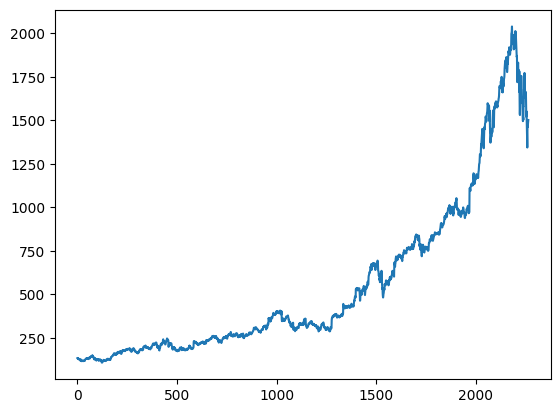

1812 453


In [16]:
#Ploting it
plt.plot(df_close)
plt.show()



In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

1812 453


In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): 
    #keep only similar value data if a data point is too far of the last one 
    #jump to the next value
    dataX, dataY = [], []       
    #put this in data x
    for i in range(len(dataset)-look_back-1): #let dataY have only output values
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [19]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [25]:
# Step 2 Build Model
model = Sequential()

model.add(LSTM(units=50, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Use 'units' instead of 'output_dim'
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

model.fit(trainX,trainY,batch_size=128,epochs = 80,validation_split=0.05)

compilation time :  0.004740476608276367
Epoch 1/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0173 - mae: 0.0950 - val_loss: 0.0752 - val_mae: 0.2735
Epoch 2/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - mae: 0.0701 - val_loss: 0.0618 - val_mae: 0.2478
Epoch 3/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0085 - mae: 0.0709 - val_loss: 0.0550 - val_mae: 0.2337
Epoch 4/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083 - mae: 0.0712 - val_loss: 0.0584 - val_mae: 0.2410
Epoch 5/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0079 - mae: 0.0681 - val_loss: 0.0555 - val_mae: 0.2348
Epoch 6/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 - mae: 0.0698 - val_loss: 0.0617 - val_mae: 0.2476
Epoch 7/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 - mae: 0.0708 - val_loss: 0.0559 - val_mae: 0.2357
Epoch 8/80
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 - mae: 0.0692 - val_loss: 0.0544 - val_mae: 0.2325
Epoch 9/80
14/14 ━━━━━━━━━━━

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


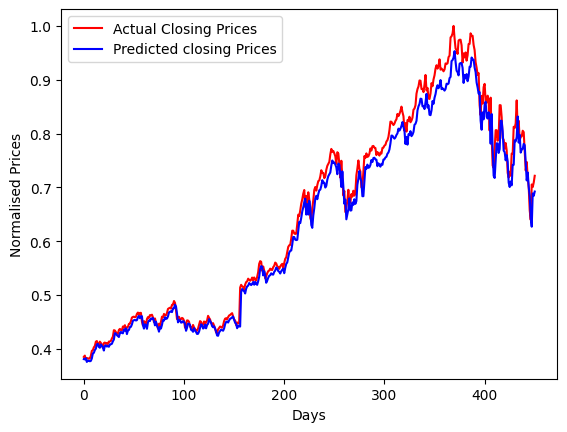

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1062e-05 - mae: 0.0023 


In [26]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

In [27]:
model.fit(trainX,trainY,batch_size=128,epochs=40,validation_split=0.05)

Epoch 1/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5108e-04 - mae: 0.0083 - val_loss: 4.1939e-05 - val_mae: 0.0052
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4563e-04 - mae: 0.0083 - val_loss: 2.6404e-05 - val_mae: 0.0037
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5697e-04 - mae: 0.0086 - val_loss: 4.3443e-05 - val_mae: 0.0053
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4382e-04 - mae: 0.0081 - val_loss: 2.7596e-05 - val_mae: 0.0038
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5420e-04 - mae: 0.0084 - val_loss: 2.8693e-05 - val_mae: 0.0040
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4429e-04 - mae: 0.0085 - val_loss: 2.8159e-05 - val_mae: 0.0039
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5797e-04 - mae: 0.0085 - val_loss: 5.3781e-05 - val_mae: 0.0062
Epoch 8/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4485e-04 - mae: 0.0086 - val_loss: 9.6610e-05 - val_mae: 0.0088
Epoch 9

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


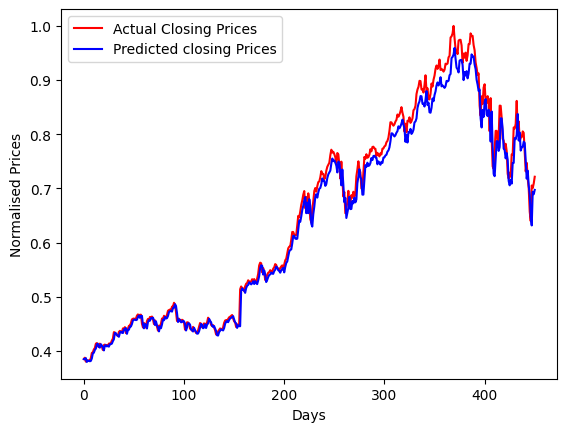

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0038e-05 - mae: 0.0024 


In [28]:
"""**Final Predictions**"""

import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)
